In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [3]:
df = pd.read_csv('../data/SyriaTel_customer_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

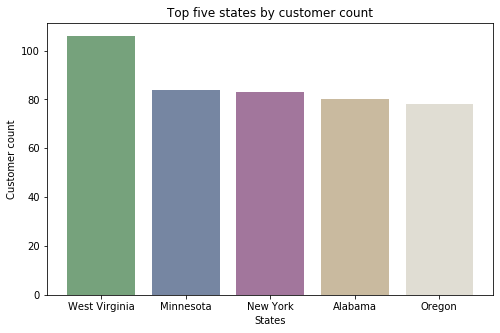

In [9]:
plt.figure(figsize=(8,5));
plt.title('Top five states by customer count');
plt.ylabel('Customer count');
plt.xlabel('States')
tp_fv_st = df['state'].value_counts()[:5]
states = ['West Virginia', 'Minnesota', 'New York', 'Alabama', 'Oregon']
colors1 = ['#76a27c', '#7686a2', '#a2769c', '#c9ba9f', '#e0ddd3']
plt.bar(states,tp_fv_st,color=colors1);

In [10]:
total_call_per_day = df['total day calls'] + df['total eve calls'] + df['total night calls']
calls_counts = pd.concat([df['state'],total_call_per_day],axis=1)
states_counts = df['state'].value_counts().reset_index().rename(columns={'index':'state','state':'count'})   
call_by_state = calls_counts.groupby('state')[0].sum().reset_index().rename(columns={0:'calls'})
calls_per_st = pd.merge(states_counts,call_by_state)
calls_per_st['calls_per_cust'] = calls_per_st['calls']/calls_per_st['count']
calls_per_st = calls_per_st.sort_values(by='calls_per_cust',ascending=False)
calls_per_st[:5]

,state,count,calls,calls_per_cust
43,GA,54,16868,312.370370
28,FL,63,19546,310.253968
32,ND,62,19089,307.887097
20,NC,68,20892,307.235294
15,IN,71,21792,306.929577


In [11]:
state_count = df['state'].value_counts().reset_index().rename(columns={'index':'state','state':'count'})
state_churn = df.groupby('state')['churn'].sum().reset_index()
states_ct_ch = pd.merge(state_count,state_churn,how='left')
states_ct_ch['percent'] =  round((states_ct_ch['churn'] / states_ct_ch['count']) *100,2)
states_ct_ch = states_ct_ch.sort_values(by='percent',ascending=False).reset_index(drop=True)
print('The average churn rate is:',round(states_ct_ch['percent'].mean(),2),'percent')

The average churn rate is: 14.49 percent
